## NBA Combine and Careers: How Athleticism Translates into Box Score Performance
#### *STATS 131 | Group 7 | Fall 2019*

## 1. Introduction and Background

Athleticism has long been a heavily desired trait, if not outright requirement, for the vast majority of sports hopefuls. From badminton to rugby, "players" have become synonymous with "athletes," complete with training regimens, health checkups, diet adjustments, and near-constant gym photos. At the same time, sports history is littered with examples of surprising successes from the less-athletic (Wayne Gretzky, Steve Nash, and the like), and conversely, the drafting process for almost every sport includes numerous busts who demonstrated excellent jumping or running ability but simply failed to play the game well. Basketball stands as an exemplar of this principle, and every year, countless draft experts and scouts dedicate sizable swaths of time to predicting which players will maximize their physical gifts, or else compensate with some other superb skill. In this notebook, we will seek to answer that underlying, motivating question: **how does initial athleticism translate into on-court production?**

We will examine NBA data, acquired from two sources: a [Basketball-Reference query](http://bkref.com/tiny/pYeHd) and NBA combine data scraped from [DraftExpress](https://data.world/achou/nba-draft-combine-measurements/workspace/file?filename=nba_draft_combine_all_years.csv). 
* The former uses statistics from Sportradar, the [official stats partner of the NBA](https://sportradar.us/2016/09/nba-announces-multiyear-partnership-with-sportradar-and-second-spectrum/).

## 2. Setup and Joining

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
player_avgs = pd.read_csv('player_avgs.csv')
nba_combine = pd.read_csv('nba_draft_combine_all_years.csv')

In [5]:
# check data
player_avgs.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2014,NBA,2,51,NYK,Thanasis Antetokounmpo\antetth01,21.348,F,gr,...,1.0,0.3,0.0,0.0,0.667,0.800,0.000,NaN,0.1,0.304
1,2,2009,NBA,1,3,OKC,James Harden\hardeja01,19.308,G,us,...,5.2,6.2,1.5,0.5,0.442,0.507,0.363,0.859,122.5,0.223
2,3,2011,NBA,1,15,IND,Kawhi Leonard\leonaka01,19.364,F,us,...,6.3,2.4,1.8,0.7,0.494,0.537,0.383,0.848,66.9,0.220
3,4,2013,NBA,1,27,DEN,Rudy Gobert\goberru01,21.006,C,fr,...,10.6,1.3,0.7,2.2,0.628,0.629,0.000,0.631,53.6,0.216
4,5,2012,NBA,1,1,NOH,Anthony Davis\davisan02,19.114,F-C,us,...,10.5,2.1,1.4,2.4,0.516,0.533,0.311,0.797,73.2,0.215


In [6]:
nba_combine.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


We'll rename the `Draft pick` column in `nba_combine` to `Pk`, in order to facilitate joining the two datasets later:

In [68]:
nba_combine.rename(columns = {'Draft pick': 'Pk'}, inplace = True)

Then, we need to clean the players' names in the `player_avgs` dataframe, so that the part after the slash is not included.

In [7]:
player_avgs.Player = [name.split('\\')[0] for name in player_avgs.Player]
player_avgs.Player[0:5]

0    Thanasis Antetokounmpo
1              James Harden
2             Kawhi Leonard
3               Rudy Gobert
4             Anthony Davis
Name: Player, dtype: object

In [70]:
combine_careers_raw = pd.merge(nba_combine, player_avgs, on = ['Player', 'Pk'], how = 'inner')
# combine_careers_raw.to_csv('combine_careers.csv')
combine_careers_raw.head()

,Unnamed: 0,Player,Year_x,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year_y,Lg,Rd,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,NBA,1,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NBA,1,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,NBA,1,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,NBA,1,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,NBA,1,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


## 3. Cleaning the Data

Let's look at the structure of our data. We see below that we have 368 rows and 44 columns, but we have quite a few missing values in several columns. There's also seems to be several redundant columns that could be removed (e.g., `Year_x` and `Year_y`).

In [71]:
combine_careers_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 43 columns):
Unnamed: 0                  366 non-null int64
Player                      366 non-null object
Year_x                      366 non-null int64
Pk                          366 non-null float64
Height (No Shoes)           366 non-null float64
Height (With Shoes)         366 non-null float64
Wingspan                    366 non-null float64
Standing reach              366 non-null float64
Vertical (Max)              317 non-null float64
Vertical (Max Reach)        317 non-null float64
Vertical (No Step)          317 non-null float64
Vertical (No Step Reach)    317 non-null float64
Weight                      365 non-null float64
Body Fat                    365 non-null float64
Hand (Length)               328 non-null float64
Hand (Width)                326 non-null float64
Bench                       209 non-null float64
Agility                     312 non-null float64
Sprint            

#### A. Removing Unnecessary Columns

We immediately notice that the first column is unnecessary, so we can remove it.

In [125]:
combine_careers = combine_careers_raw.copy()
combine_careers.drop('Unnamed: 0', 1, inplace = True)

We also notice that we have two year columns. Are there any discrepancies between the two? The answer is yes:

In [99]:
year_diff = combine_careers[['Year_x', 'Year_y']][combine_careers.Year_x != combine_careers.Year_y]
combine_careers.iloc[year_diff.index][['Player', 'Year_x', 'Year_y']]

,Player,Year_x,Year_y
15,Damion James,2009,2010
33,Gani Lawal,2009,2010
36,Luke Harangody,2009,2010
293,Justin Jackson,2016,2017
300,Caleb Swanigan,2016,2017
304,Josh Hart,2016,2017
326,Jaron Blossomgame,2016,2017


A quick look at these players' NBA combine results shows that `Year_y`  is the correct column (for [2010](https://www.nbadraft.net/2010-nba-draft-combine-official-measurements/) and [2017](https://www.nbadraft.net/2017-nba-draft-combine-measurements/) draftees). A brief check against the [official NBA Combine data](https://stats.nba.com/draft/combine-anthro/?SeasonYear=2016-17) shows that player statistics are still accurate, with some minor rounding differences. We'll go ahead and delete the `Year_x` column, and rename `Year_y` to `Year`.

In [126]:
combine_careers.drop('Year_x', 1, inplace = True)
combine_careers.rename(columns = {'Year_y': 'Year'}, inplace = True)

Other columns we can delete: `Lg` and `Rd` (which stand for league and draft round, respectively). These are redundant because all players are in the NBA league, and because [draft round is redundant information if we know the draft pick](https://www.nba.com/nba-draft-lottery-explainer) (picks 1-30 are in round 1, and picks 31-60 are in round 2).

In [127]:
combine_careers.drop(['Lg', 'Rd'], 1, inplace = True)

In [128]:
# A final look...
combine_careers.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


#### B. Removing Players Who Never Played

We can easily see that there are a number of players who participated in the draft combine, were drafted, but never played a single game.

In [165]:
combine_careers[combine_careers.G.isnull()].Player

34       Jack McClinton
62        Terrico White
70          Tiny Gallon
71        Ryan Richards
76     Stanley Robinson
115         Jon Diebler
163       Marcus Denmon
202      Colton Iverson
204      Deshaun Thomas
228     DeAndre Daniels
241          Alec Brown
246       Xavier Thames
279      Olivier Hanlan
281     Marcus Thornton
284         Aaron White
285        Tyler Harvey
287         J.P. Tokoto
325      Isaiah Cousins
Name: Player, dtype: object

Let's go ahead and delete these rows, since they won't help us learn about how athleticism affects career.

In [168]:
combine_careers = combine_careers[combine_careers.G.notnull()]
# no more players who didn't play any games
len(combine_careers[combine_careers.G.isnull()].Player)

0

In [1]:
combine_careers.head()

NameError: name 'combine_careers' is not defined

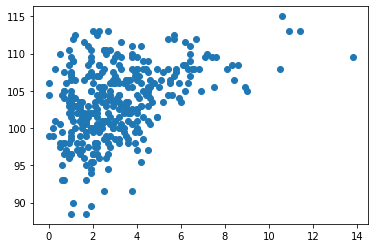

In [26]:
plt.scatter('RPG', 'Standing reach', data = combine_careers)

In [33]:
combine_careers.columns

Index(['Unnamed: 0', 'Player', 'Year_x', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint', 'Rk', 'Year_y', 'Lg',
       'Rd', 'Pk', 'Tm', 'Age', 'Pos', 'Born', 'College', 'From', 'To', 'G',
       'MPG', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '2P%', '3P%', 'FT%',
       'WS', 'WS/48'],
      dtype='object')

(array([ 2.,  4., 20., 33., 70., 90., 66., 50., 27.,  6.]),
 array([70.  , 72.25, 74.5 , 76.75, 79.  , 81.25, 83.5 , 85.75, 88.  ,
        90.25, 92.5 ]),
 <a list of 10 Patch objects>)

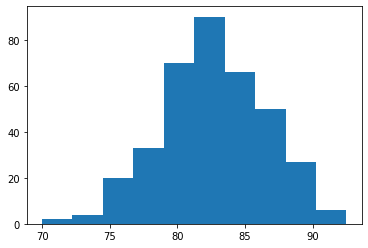

In [30]:
plt.hist('Wingspan', data = combine_careers)

C:\Users\jrtra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrtra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 30.,  16.,  76., 186.,  15.,   0.,   0.,   0.,   0.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

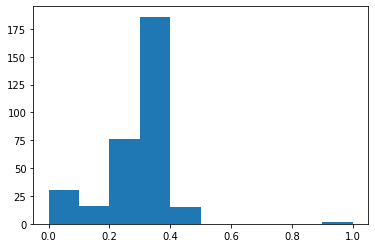

In [34]:
plt.hist('3P%', data = combine_careers)

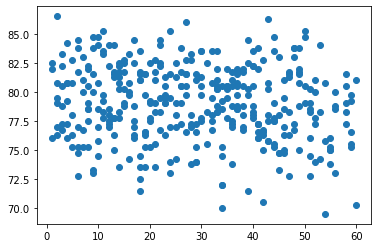

In [36]:
plt.scatter('Draft pick', 'Height (With Shoes)', data = combine_careers)

Text(0.5, 1.09, 'Heights by Birth Country')

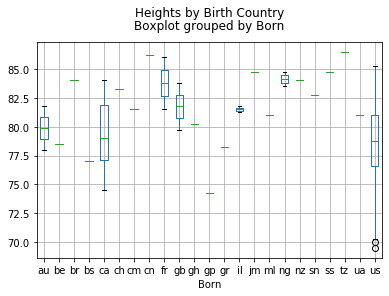

In [46]:
combine_careers.boxplot('Height (With Shoes)', by = 'Born')
plt.title('Heights by Birth Country', y=1.09)

C:\Users\jrtra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrtra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


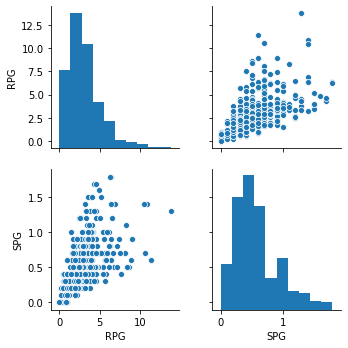

In [48]:
sns.pairplot(data = combine_careers[['RPG', 'SPG']])